### The dataset is regarding customer demographic and behavioral data, likely used for customer segmentation and marketing analytics.

In [120]:
import pandas as pd # used for loading the dataset
import numpy as np #
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [122]:
data=pd.read_csv(r"C:\Users\anju6\Downloads\Marketing_Campaign_Dataset.csv")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,14,1,1,0,0,0,0,3,11,1
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,5,1,1,0,0,0,0,3,11,1
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,1,0,0,0,1,0,3,11,1
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,14,0,1,1,0,1,0,3,11,0
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,13,1,0,0,1,1,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100274,100275,1977,PhD,Absurd,135662.71,2,1,2012-12-10,89,48,...,4,0,0,1,1,0,1,3,11,1
100275,100276,1903,Graduation,Divorced,622939.79,2,2,2014-05-16,36,8,...,14,0,1,0,1,0,1,3,11,1
100276,100277,1929,Graduation,Divorced,410351.37,2,2,2012-10-11,90,813,...,3,1,0,0,1,0,1,3,11,1
100277,100278,1986,Basic,YOLO,64094.50,2,2,2014-07-01,84,535,...,10,1,1,0,1,0,1,3,11,1


In [123]:
data['Marital_Status'].unique()

array(['Single', 'Married', 'Alone', 'YOLO', 'Divorced', 'Together',
       'Widow', 'Absurd'], dtype=object)

In [124]:
# Display basic info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

In [125]:
data.describe()



,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,...,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.0,100279.0,100279.000000
mean,50140.000000,1944.139720,333467.834329,1.001845,0.999741,49.002802,746.463477,99.083387,862.007549,129.312987,...,9.499078,0.502139,0.500514,0.500873,0.497951,0.501890,0.499576,3.0,11.0,0.498988
std,28948.198159,29.713721,191857.770691,0.817953,0.816680,28.531490,431.644442,57.403252,498.945468,74.862017,...,5.771568,0.499998,0.500002,0.500002,0.499998,0.499999,0.500002,0.0,0.0,0.500001
min,1.000000,1893.000000,1735.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,25070.500000,1918.000000,167676.135000,0.000000,0.000000,24.000000,372.000000,50.000000,431.000000,65.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,50140.000000,1944.000000,332609.990000,1.000000,1.000000,49.000000,746.000000,99.000000,862.000000,130.000000,...,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.0,11.0,0.000000
75%,75209.500000,1970.000000,498824.360000,2.000000,2.000000,74.000000,1119.000000,149.000000,1297.000000,194.000000,...,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
max,100279.000000,1995.000000,666664.130000,2.000000,2.000000,98.000000,1492.000000,198.000000,1724.000000,258.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [126]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,14,1,1,0,0,0,0,3,11,1
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,5,1,1,0,0,0,0,3,11,1
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,1,0,0,0,1,0,3,11,1
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,14,0,1,1,0,1,0,3,11,0
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,13,1,0,0,1,1,0,3,11,0


In [127]:
data['Marital_Status'].unique()

array(['Single', 'Married', 'Alone', 'YOLO', 'Divorced', 'Together',
       'Widow', 'Absurd'], dtype=object)

In [128]:
# Check for missing values
print(data.isnull().sum())

# Convert Dt_Customer to datetime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

# Fix categorical anomalies
data["Marital_Status"] = data["Marital_Status"].replace(["YOLO", "Absurd", "Alone"], "Other")


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [129]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,14,1,1,0,0,0,0,3,11,1
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,5,1,1,0,0,0,0,3,11,1
2,3,1972,Graduation,Other,521309.22,2,2,2013-02-15,93,62,...,1,1,0,0,0,1,0,3,11,1
3,4,1911,PhD,Other,231628.91,1,0,2013-06-12,13,251,...,14,0,1,1,0,1,0,3,11,0
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,13,1,0,0,1,1,0,3,11,0


In [130]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=["Education", "Marital_Status"], drop_first=True)
data


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1,1978,491796.22,1,0,2013-12-26,31,1364,72,1129,...,1,False,False,True,False,False,False,True,False,False
1,2,1974,513926.78,1,0,2014-05-04,23,1275,94,455,...,1,False,False,True,False,True,False,False,False,False
2,3,1972,521309.22,2,2,2013-02-15,93,62,127,530,...,1,False,True,False,False,False,True,False,False,False
3,4,1911,231628.91,1,0,2013-06-12,13,251,87,1153,...,0,False,False,False,True,False,True,False,False,False
4,5,1931,223936.10,1,1,2013-05-30,65,670,10,650,...,0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100274,100275,1977,135662.71,2,1,2012-12-10,89,48,87,1208,...,1,False,False,False,True,False,True,False,False,False
100275,100276,1903,622939.79,2,2,2014-05-16,36,8,92,1591,...,1,False,True,False,False,False,False,False,False,False
100276,100277,1929,410351.37,2,2,2012-10-11,90,813,91,990,...,1,False,True,False,False,False,False,False,False,False
100277,100278,1986,64094.50,2,2,2014-07-01,84,535,1,1640,...,1,True,False,False,False,False,True,False,False,False


In [131]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to binary categorical features
data["Complain"] = label_encoder.fit_transform(data["Complain"])
data["Response"] = label_encoder.fit_transform(data["Response"])


In [132]:
data[["Complain", "Response"]]


,Complain,Response
0,0,1
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
100274,1,1
100275,1,1
100276,1,1
100277,1,1


### Observations:
1. There are 100279 rows
2. There are 29 columns
3. No missing values
    

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[["Income", "Recency", "MntWines"]] = scaler.fit_transform(data[["Income", "Recency", "MntWines"]])
data.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1,1978,0.825242,1,0,2013-12-26,-0.630983,1.430667,72,1129,...,1,False,False,True,False,False,False,True,False,False
1,2,1974,0.940592,1,0,2014-05-04,-0.911377,1.224478,94,455,...,1,False,False,True,False,True,False,False,False,False
2,3,1972,0.979071,2,2,2013-02-15,1.542065,-1.585719,127,530,...,1,False,True,False,False,False,True,False,False,False
3,4,1911,-0.530807,1,0,2013-06-12,-1.261868,-1.147857,87,1153,...,0,False,False,False,True,False,True,False,False,False
4,5,1931,-0.570904,1,1,2013-05-30,0.560688,-0.177145,10,650,...,0,False,False,False,False,False,False,False,False,False


In [135]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
data[["Income", "Recency", "MntWines"]] = minmax_scaler.fit_transform(data[["Income", "Recency", "MntWines"]])
data

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1,1978,0.737013,1,0,2013-12-26,0.316327,0.914209,72,1129,...,1,False,False,True,False,False,False,True,False,False
1,2,1974,0.770295,1,0,2014-05-04,0.234694,0.854558,94,455,...,1,False,False,True,False,True,False,False,False,False
2,3,1972,0.781398,2,2,2013-02-15,0.948980,0.041555,127,530,...,1,False,True,False,False,False,True,False,False,False
3,4,1911,0.345742,1,0,2013-06-12,0.132653,0.168231,87,1153,...,0,False,False,False,True,False,True,False,False,False
4,5,1931,0.334173,1,1,2013-05-30,0.663265,0.449062,10,650,...,0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100274,100275,1977,0.201416,2,1,2012-12-10,0.908163,0.032172,87,1208,...,1,False,False,False,True,False,True,False,False,False
100275,100276,1903,0.934242,2,2,2014-05-16,0.367347,0.005362,92,1591,...,1,False,True,False,False,False,False,False,False,False
100276,100277,1929,0.614526,2,2,2012-10-11,0.918367,0.544906,91,990,...,1,False,True,False,False,False,False,False,False,False
100277,100278,1986,0.093784,2,2,2014-07-01,0.857143,0.358579,1,1640,...,1,True,False,False,False,False,True,False,False,False


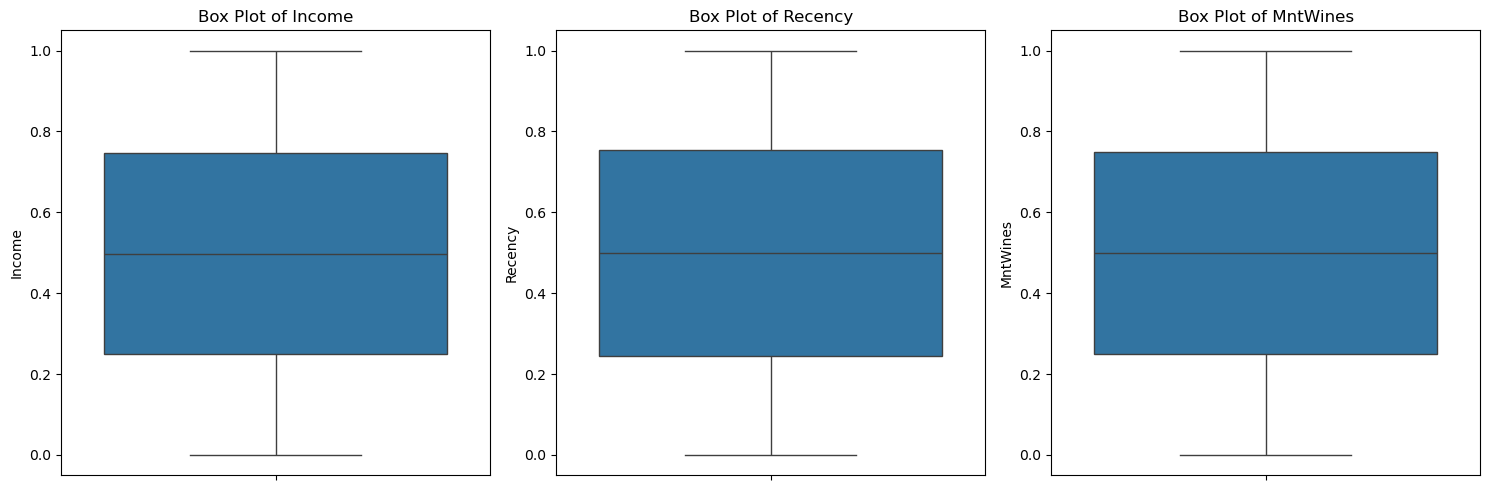

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot
numerical_columns = ['Income', 'Recency', 'MntWines']

# Create individual box plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=data[col])  # <-- Use `data` instead of `data_encoded`
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [137]:
Q1 = data["Income"].quantile(0.25)
Q3 = data["Income"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data["Income"] >= lower_bound) & (data["Income"] <= upper_bound)]


In [138]:
data.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1,1978,0.737013,1,0,2013-12-26,0.316327,0.914209,72,1129,...,1,False,False,True,False,False,False,True,False,False
1,2,1974,0.770295,1,0,2014-05-04,0.234694,0.854558,94,455,...,1,False,False,True,False,True,False,False,False,False
2,3,1972,0.781398,2,2,2013-02-15,0.948980,0.041555,127,530,...,1,False,True,False,False,False,True,False,False,False
3,4,1911,0.345742,1,0,2013-06-12,0.132653,0.168231,87,1153,...,0,False,False,False,True,False,True,False,False,False
4,5,1931,0.334173,1,1,2013-05-30,0.663265,0.449062,10,650,...,0,False,False,False,False,False,False,False,False,False


In [180]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["ID", "Response"])
y = data["Response"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [182]:
print(X_train.dtypes)


Year_Birth                          int64
Income                            float64
Kidhome                             int64
Teenhome                            int64
Dt_Customer                datetime64[ns]
Recency                           float64
MntWines                          float64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                        int64
AcceptedCmp2                        int64
Complain                            int64
Z_CostContact                     

In [184]:
X_train["Customer_Age_Days"] = (X_train["Dt_Customer"].max() - X_train["Dt_Customer"]).dt.days
X_test["Customer_Age_Days"] = (X_test["Dt_Customer"].max() - X_test["Dt_Customer"]).dt.days


In [186]:
X_train = X_train.drop(columns=["Dt_Customer"])
X_test = X_test.drop(columns=["Dt_Customer"])

In [188]:
X_train = X_train.select_dtypes(exclude=["datetime64"])
X_test = X_test.select_dtypes(exclude=["datetime64"])

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)



RandomForestClassifier()

In [191]:
# Predict and check accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.5020608961574259


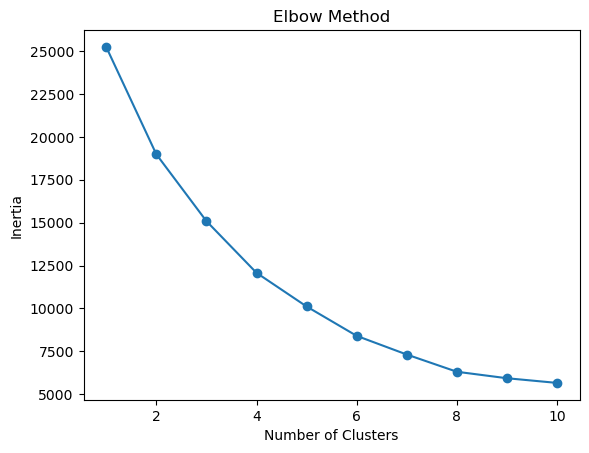

In [194]:
from sklearn.cluster import KMeans

# Select features for clustering
features = ["Income", "Recency", "MntWines"]
X_cluster = data[features]

# Finding the optimal k using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


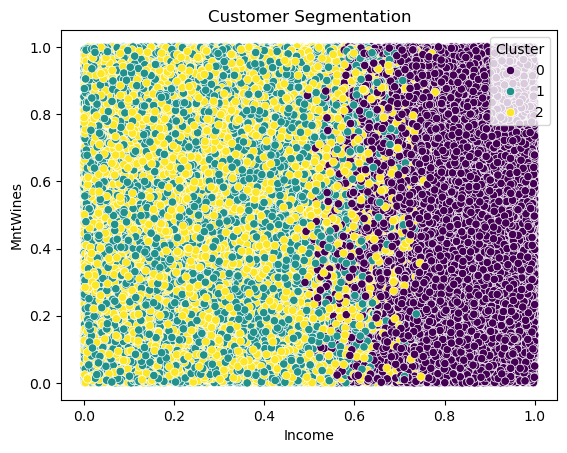

In [196]:
# Train K-Means with 3 clusters (example)
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_cluster)

# Visualizing Clusters
sns.scatterplot(x=data["Income"], y=data["MntWines"], hue=data["Cluster"], palette="viridis")
plt.title("Customer Segmentation")
plt.show()


## Interpreting the Clusters
>Cluster 0: High-income, high spenders.

>Cluster 1: Low-income, moderate spenders.

>Cluster 2: Middle-income, low spenders.

>This segmentation helps in targeted marketing strategies.